# Explanatory_Analysis of Ford GoBike Data
## by (Govardhan K)

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('forgobike_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What are the top 20 stations that have more start of journey

The highest rides that start from is Market St at 10th St and the next 19 stations are given below

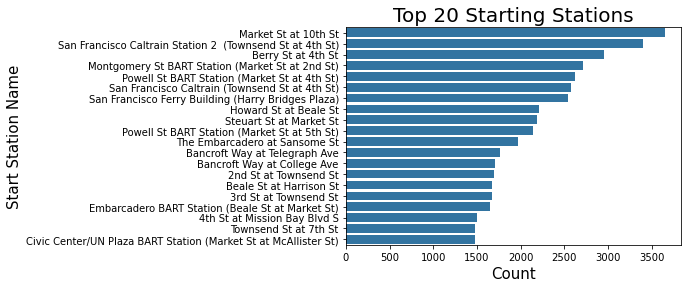

In [32]:
# top 20 Start Stations
start_station = df_clean['start_station_name'].value_counts().head(20)
start_order = start_station.index
start_station_sub = df_clean.loc[df_clean['start_station_name'].isin(start_station.index)]
gen_color = sns.color_palette()[0]

sns.countplot(data=start_station_sub, y='start_station_name', color = gen_color, order = start_order);
plt.title('Top 20 Starting Stations', size = 20)
plt.xlabel('Count', size=15)
plt.ylabel('Start Station Name', size=15);

## Top 20 End stations where ride ends

The top most station where rides are ended is San Franciso Caltrain Station 2 (Townsend St at 4th St) which is also the second top station where rides start.

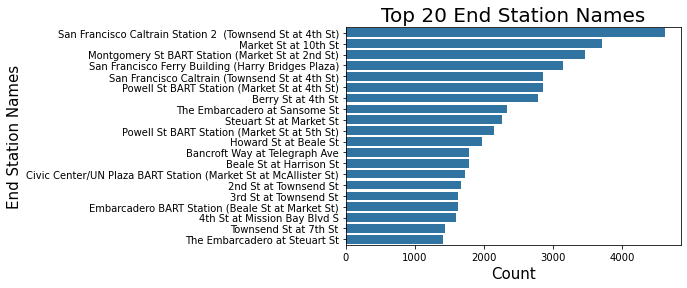

In [31]:
# Top 20 End stations

end_station = df_clean['end_station_name'].value_counts().head(20)
end_order = end_station.index
end_station_sub = df_clean.loc[df_clean['end_station_name'].isin(end_station.index)]

sns.countplot(data=end_station_sub, y='end_station_name', order = end_order, color = gen_color)
plt.title('Top 20 End Station Names', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('End Station Names', size=15);

## Duration of the trip  by gender
The male users have slight less trip duration compared to others

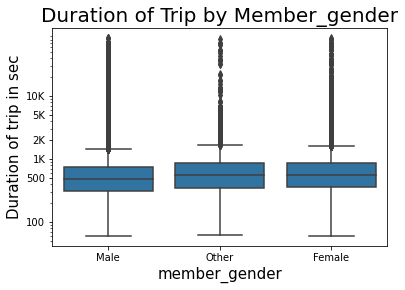

In [29]:
sns.boxplot(data = df_clean, x = 'member_gender', y = 'duration_sec', color = gen_color)
plt.yscale('log')
yticks = [100, 500, 1000, 2000, 5000, 10000]
ylabel = ['100', '500', '1K', '2K', '5K', '10K']
plt.yticks(yticks, ylabel);
plt.xlabel('member_gender', size = 15)
plt.ylabel('Duration of trip in sec', size = 15)
plt.title('Duration of Trip by Member_gender', size = 20);

## Duration of the trip by user type [ subscriber vs customer]

Apparently the subscriber have less trip time compared the non-subscribed users.

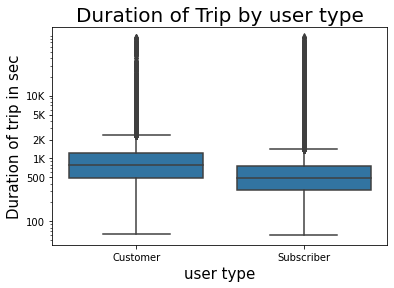

In [30]:
# relationship between duration and the user type
sns.boxplot(data = df_clean, x='user_type', y = 'duration_sec', color = gen_color)
plt.yscale('log')
yticks = [100, 500, 1000, 2000, 5000, 10000]
ylabel = ['100', '500', '1K', '2K', '5K', '10K']
plt.yticks(yticks, ylabel);
plt.xlabel('user type', size = 15)
plt.ylabel('Duration of trip in sec', size = 15)
plt.title('Duration of Trip by user type', size = 20);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [33]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 710010 bytes to slide_deck_template.slides.html
